In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
class world_bank():
    def __init__(self,indicator_string):
        self.indicator_string=indicator_string
        url='http://api.worldbank.org/v2/country/all/indicator/'
        url=url+self.indicator_string+f"?format=json"
        data=requests.get(url)
        new_data=data.json()

        page_n=new_data[0]['total']


        url=url+f"&per_page={page_n}"

        data=requests.get(url)
        new_data=data.json()
        
        self.new_data=new_data[1]
        
        
    def get_countries(self):
        unique_country_names = []
        for i in pd.DataFrame(self.new_data)['country']:
            if i['value'] not in unique_country_names:
                unique_country_names.append(i['value'])
            
        group_of_countries = []
        countries = []
        reached_afganistan = False
        
        for country in unique_country_names:
            if reached_afganistan == False:
            
                if country == 'Afghanistan':
                    reached_afganistan = True
                    countries.append(country)
                
                elif country != 'Afghanistan':
                    group_of_countries.append(country)

            elif reached_afganistan == True:
                countries.append(country)

        return group_of_countries, countries
        
        
    def get_indicator(self,country=None,name=None):
        
        if name==None:
            name=self.indicator_string
            
        
        dataset = []
        
        if country != None:
            for i in self.new_data:

                if i['country']['value'] in country:

                    country_name = i['country']['value']
                    date_value= int( i['date'] )

                    if i['value'] != None:
                        wb_indicator = i['value']

                    else:
                        wb_indicator = np.nan

                    dataset.append([country_name,date_value,wb_indicator])
        
        else:
            
            for i in self.new_data:
                country_name = i['country']['value']
                date_value= int( i['date'] )

                if i['value'] != None:
                    wb_indicator = i['value']

                else:
                    wb_indicator = np.nan

                dataset.append([country_name,date_value,wb_indicator])


        return pd.DataFrame(dataset,columns=['country_name','date_value',name],index=None)
    
    
    
    

In [3]:
get_wb=world_bank('SE.SEC.CMPT.LO.FE.ZS')

In [4]:
group_of_countries, countries=get_wb.get_countries()

In [5]:
literacy_rate_female=get_wb.get_indicator(country=countries,name='literacy_rate_female')


In [6]:
get_wb=world_bank('SP.DYN.CBRT.IN')
birth_rate=get_wb.get_indicator(country=countries,name='birth_rate')

In [7]:
len(literacy_rate_female), len(birth_rate)

(13237, 13237)

In [8]:
literacy_rate_female

,country_name,date_value,literacy_rate_female
0,Afghanistan,2020,NaN
1,Afghanistan,2019,43.127281
2,Afghanistan,2018,40.103439
3,Afghanistan,2017,38.553131
4,Afghanistan,2016,36.819771
...,...,...,...
13232,Zimbabwe,1964,NaN
13233,Zimbabwe,1963,NaN
13234,Zimbabwe,1962,NaN
13235,Zimbabwe,1961,NaN


In [9]:
birth_rate_literacy=pd.merge(literacy_rate_female,birth_rate,on=['country_name','date_value'],how='left')
birth_rate_literacy

,country_name,date_value,literacy_rate_female,birth_rate
0,Afghanistan,2020,NaN,NaN
1,Afghanistan,2019,43.127281,31.802
2,Afghanistan,2018,40.103439,32.487
3,Afghanistan,2017,38.553131,33.211
4,Afghanistan,2016,36.819771,33.981
...,...,...,...,...
13232,Zimbabwe,1964,NaN,47.770
13233,Zimbabwe,1963,NaN,47.876
13234,Zimbabwe,1962,NaN,47.950
13235,Zimbabwe,1961,NaN,47.988


<AxesSubplot:>

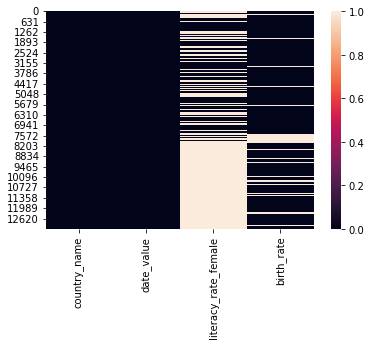

In [10]:
sns.heatmap(data=birth_rate_literacy.isnull())

In [11]:
birth_rate_literacy['literacy_rate_female'].notnull().sum()

3590

In [12]:
birth_rate_literacy= birth_rate_literacy.dropna()
birth_rate_literacy

,country_name,date_value,literacy_rate_female,birth_rate
1,Afghanistan,2019,43.127281,31.802
2,Afghanistan,2018,40.103439,32.487
3,Afghanistan,2017,38.553131,33.211
4,Afghanistan,2016,36.819771,33.981
15,Afghanistan,2005,8.932230,44.723
...,...,...,...,...
13181,Zimbabwe,2015,62.563049,33.981
13182,Zimbabwe,2014,73.652512,34.978
13183,Zimbabwe,2013,71.939911,35.768
13184,Zimbabwe,2012,70.399910,36.292


In [13]:
india=(birth_rate_literacy.where(birth_rate_literacy['country_name']=='India')).dropna()
india

,country_name,date_value,literacy_rate_female,birth_rate
5430,India,2019.0,85.295357,17.644
5432,India,2017.0,87.854462,18.083
5433,India,2016.0,88.972900,18.332
5434,India,2015.0,88.395126,18.625
5435,India,2014.0,88.440247,18.984
5436,India,2013.0,83.715622,19.416
5438,India,2011.0,75.686798,20.495
5441,India,2008.0,65.499802,22.390
5443,India,2006.0,58.442268,23.564
5446,India,2003.0,51.362068,25.034


Text(0, 0.5, 'birth_rate')

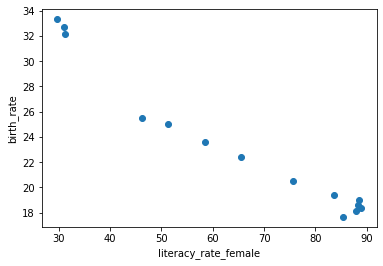

In [14]:
plt.scatter(india['literacy_rate_female'],india['birth_rate'])
plt.xlabel('literacy_rate_female')
plt.ylabel('birth_rate')

Text(0, 0.5, 'birth_rate')

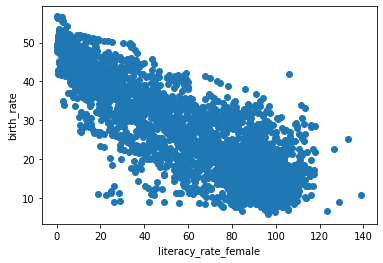

In [15]:
plt.scatter(birth_rate_literacy['literacy_rate_female'],birth_rate_literacy['birth_rate'])
plt.xlabel('literacy_rate_female')
plt.ylabel('birth_rate')

In [16]:
corelation=birth_rate_literacy.corr()
corelation['literacy_rate_female'].sort_values(ascending=False)

literacy_rate_female    1.000000
date_value              0.511121
birth_rate             -0.857604
Name: literacy_rate_female, dtype: float64

# Observation
Female Litercy and Birth rate has a negative correlation